# Problema 2.6 
### Isomerizaci6n adiabática enfase líquida

"Elementos de Ingeniería de las reacciones químicas" ,Scott Fogler capitulo 2, página 62

![newnotebook](../imágenes/problema2.7.png)

Primero importaremos la librerías que nos ayudaran a resolver el problema (No olvides activar las librerías con **Shift+enter**):
    

In [1]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.integrate import simps

In [2]:
# Datos
X = numpy.array([0.0, 0.2, 0.4, 0.6, 0.65])
rA = numpy.array([39, 53, 59, 38, 25])  # kgmol / (m3*h)

In [3]:
# Cálculos para Fao/-rA
Fao = 50  # kgmol/h
Fao_rA = Fao / rA

In [4]:
# Delimitación del área sombreada
y0 = numpy.zeros(len(Fao_rA))


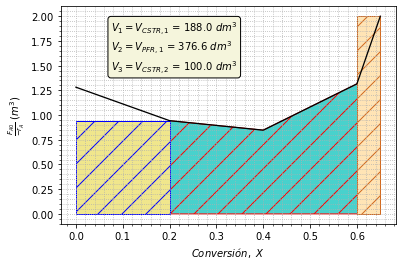

In [5]:
# Gráfica
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.minorticks_on()
ax.set_xlabel('$Conversión, \\ X$')
ax.set_ylabel('$\\frac{F_{A0}}{-r_A} \\ \\left( m^3 \\right)$')
ax.plot(X, Fao_rA, 'k', linewidth=1.3)
ax.grid(which='BOTH', ls=':')
ax.grid(True)
ax.add_patch(Rectangle(xy=(0.0, 0.0), width=0.2, height=Fao_rA[1],
                       alpha=1, facecolor='khaki',
                       fill=True, edgecolor='blue', hatch="/"))
ax.fill_between(X[1:], y0[1:], Fao_rA[1:], where=Fao_rA[1:] > y0[1:],
                facecolor='mediumturquoise', edgecolor='red', alpha=1, hatch='/')
ax.add_patch(Rectangle(xy=(0.6, 0.0), width=0.05, height=Fao_rA[-1],
                       alpha=1, facecolor='moccasin',
                       fill=True, edgecolor='chocolate', hatch="/"))

# Cálculo de volumen
V_CSTR1 = round(0.94 * 0.2 * 1000, 2)  # dm3
V_PFR1 = round(simps(x=X[1:-1], y=Fao_rA[1:-1], dx=0.00001) * 1000.0, 2)  # dm3
V_CSTR2 = round((0.65 - 0.6) * 2 * 1000, 2)  # dm3
textstr = '$V_1 = V_{CSTR, 1}$ = ' + str(V_CSTR1) + '$\\ dm^3$\n' +\
          '$V_2 = V_{PFR, 1}$ = ' + str(V_PFR1) + '$\\ dm^3$\n' +\
          '$V_3 = V_{CSTR, 2}$ = ' + str(V_CSTR2) + '$\\ dm^3$'
position = (0.15, 0.94)
props = dict(boxstyle='round', facecolor='beige', alpha=1)
ax.text(position[0], position[1], textstr,
        transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
plt.show()